# importando Pandas e carregando dados

In [1]:
#importando biblioteca pandas
import pandas as pd

In [2]:
#carregando dados em um pandas dataframe
data = pd.read_csv("wl_data.csv")

In [3]:
#visualizando tabela (dataframe) de dados
data

Id    X    Y     Cu      Ni
0      1   11    8  0.000  0.0000
1      2    8   30  0.000  0.0000
2      3    9   48  2.244  0.0545
3      4    8   68  4.344  0.1355
4      5    9   90  4.121  0.1095
..   ...  ...  ...    ...     ...
465  466  214   19  2.425  0.0780
466  467  245  231  1.612  0.1305
467  468  233  220  6.260  4.7985
468  469  226  221  8.001  8.4075
469  470  213  218  4.826  2.3810

[470 rows x 5 columns]

In [4]:
#verificando o formato do dataframe
data.shape

(470, 5)

# Padronizando dados

In [5]:
#definindo variáveis de interesse
x_variables = ['Cu', 'Ni']

#transformando variáveis
df_std = (data[x_variables]-data[x_variables].mean())/data[x_variables].std()

#verificando estatísticas dos dados transformados
df_std.describe()

Cu            Ni
count  4.700000e+02  4.700000e+02
mean   5.032027e-16  2.379302e-16
std    1.000000e+00  1.000000e+00
min   -1.454017e+00 -6.845942e-01
25%   -8.390387e-01 -6.458843e-01
50%   -3.733449e-02 -4.089947e-01
75%    6.926610e-01  1.962499e-01
max    3.636713e+00  7.005669e+00

# Cluster analysis preliminar

In [6]:
#importando pacotes necessários
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

## Dendrograma

<Figure size 1080x360 with 0 Axes>

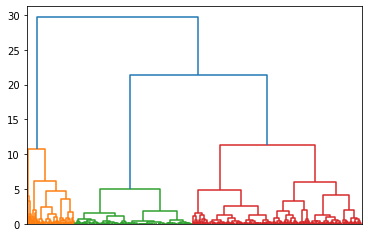

<Figure size 1080x360 with 0 Axes>

In [8]:
#definindo matriz de distancias estatísticas
z = linkage(df_std, method="ward")

#plotando dendrograma
dendrogram(z, no_labels=True, color_threshold=15)
plt.figure(figsize=(15,5))

# Calculando a inercia por numero de grupos

In [28]:
#definindo listas para armazenar resultados dos cálculos
inercia = []
n_clusters = []

#calculando valores de inercia para cada cenário de número de clusters
for i in range(1, 12):
    kmeans = KMeans(i).fit(df_std)
    inercia.append(kmeans.inertia_)
    n_clusters.append(i)

C:\Users\moreira\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
#visualizando valores de inércia
inercia

[938.0000000000008,
 426.7117025645239,
 252.2082819256079,
 187.86831683530147,
 142.52483712681013,
 119.37707977130206,
 105.37535564934399,
 88.51511111489627,
 77.90382432110023,
 67.54059214060491,
 61.40182753888611]

In [30]:
#visualizando números de clusters testados
n_clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

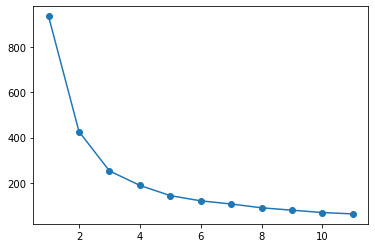

In [31]:
#plotando gráfico de inercia pelo número de clusters
plt.plot(n_clusters, inercia, marker="o")

# Atribuindo labels aos dados

In [32]:
#instanciando objeto com a classe AgglomerativeClustering e fitando o modelo com os dados transformados
hier = AgglomerativeClustering(n_clusters=2).fit(df_std)

In [33]:
#atribuindo classes ao Pandas Dataframe
data["hier_labels"] = hier.labels_

In [34]:
#visualizando dataframe
data

Id    X    Y     Cu      Ni  hier_labels  kmeans_labels
0      1   11    8  0.000  0.0000            0              2
1      2    8   30  0.000  0.0000            0              2
2      3    9   48  2.244  0.0545            0              2
3      4    8   68  4.344  0.1355            0              2
4      5    9   90  4.121  0.1095            0              2
..   ...  ...  ...    ...     ...          ...            ...
465  466  214   19  2.425  0.0780            0              2
466  467  245  231  1.612  0.1305            0              2
467  468  233  220  6.260  4.7985            0              0
468  469  226  221  8.001  8.4075            1              1
469  470  213  218  4.826  2.3810            0              0

[470 rows x 7 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

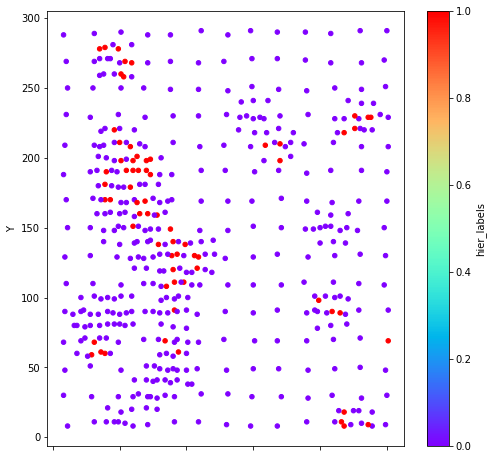

In [35]:
data.plot.scatter(x="X", y="Y", figsize=(8,8), c="hier_labels", cmap="rainbow", s = 20)

<AxesSubplot:xlabel='Cu', ylabel='Ni'>

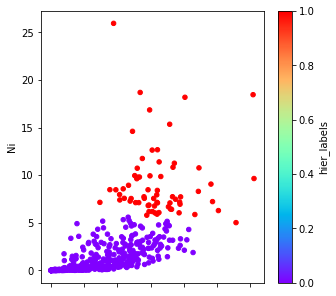

In [36]:
data.plot.scatter(x="Cu", y="Ni", figsize=(5,5), c="hier_labels", cmap="rainbow")

In [43]:
#instanciando objeto com a classe KMeans e fitando o modelo com os dados transformados
kmeans = KMeans(n_clusters=2).fit(df_std)

In [44]:
#atribuindo classes ao Pandas Dataframe
data["kmeans_labels"] = kmeans.labels_

In [45]:
data

Id    X    Y     Cu      Ni  hier_labels  kmeans_labels
0      1   11    8  0.000  0.0000            0              1
1      2    8   30  0.000  0.0000            0              1
2      3    9   48  2.244  0.0545            0              1
3      4    8   68  4.344  0.1355            0              1
4      5    9   90  4.121  0.1095            0              1
..   ...  ...  ...    ...     ...          ...            ...
465  466  214   19  2.425  0.0780            0              1
466  467  245  231  1.612  0.1305            0              1
467  468  233  220  6.260  4.7985            0              0
468  469  226  221  8.001  8.4075            1              0
469  470  213  218  4.826  2.3810            0              1

[470 rows x 7 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

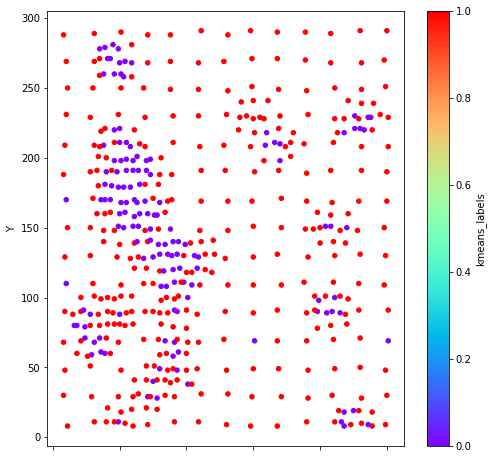

In [46]:
data.plot.scatter(x="X", y="Y", figsize=(8,8), c="kmeans_labels", cmap="rainbow", s = 20)

<AxesSubplot:xlabel='Cu', ylabel='Ni'>

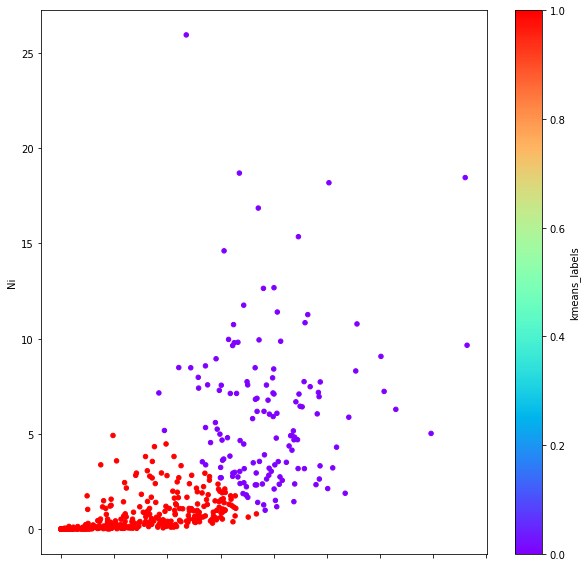

In [47]:
data.plot.scatter(x="Cu", y="Ni", figsize=(10,10), c="kmeans_labels", cmap="rainbow")

In [48]:
#salvando resultados em um arquivo .csv na pasta do projeto
data.to_csv("data_clustered.csv", index=False)